In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [36]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
df.duplicated().sum()

0

In [5]:
df.shape

(768, 9)

In [6]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()

print("Numerical features:", numerical_features)
print("Categorical features:", categorical_features)


Numerical features: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
Categorical features: []


# Column Details
1. Pregnancies: Number of pregnancies the patient has had.
2. Glucose: Plasma glucose concentration after a 2-hour oral glucose tolerance test.
3. BloodPressure: Diastolic blood pressure (mm Hg).
4. SkinThickness: Triceps skin fold thickness (mm).
5. Insulin: 2-hour serum insulin (mu U/ml).
6. BMI: Body mass index (weight in kg / (height in m)^2).
7. DiabetesPedigreeFunction: Diabetes pedigree function (a measure of diabetes risk based on family history).
8. Age: Age of the patient in years.
9. Outcome: Class variable (0 = no diabetes, 1 = diabetes).

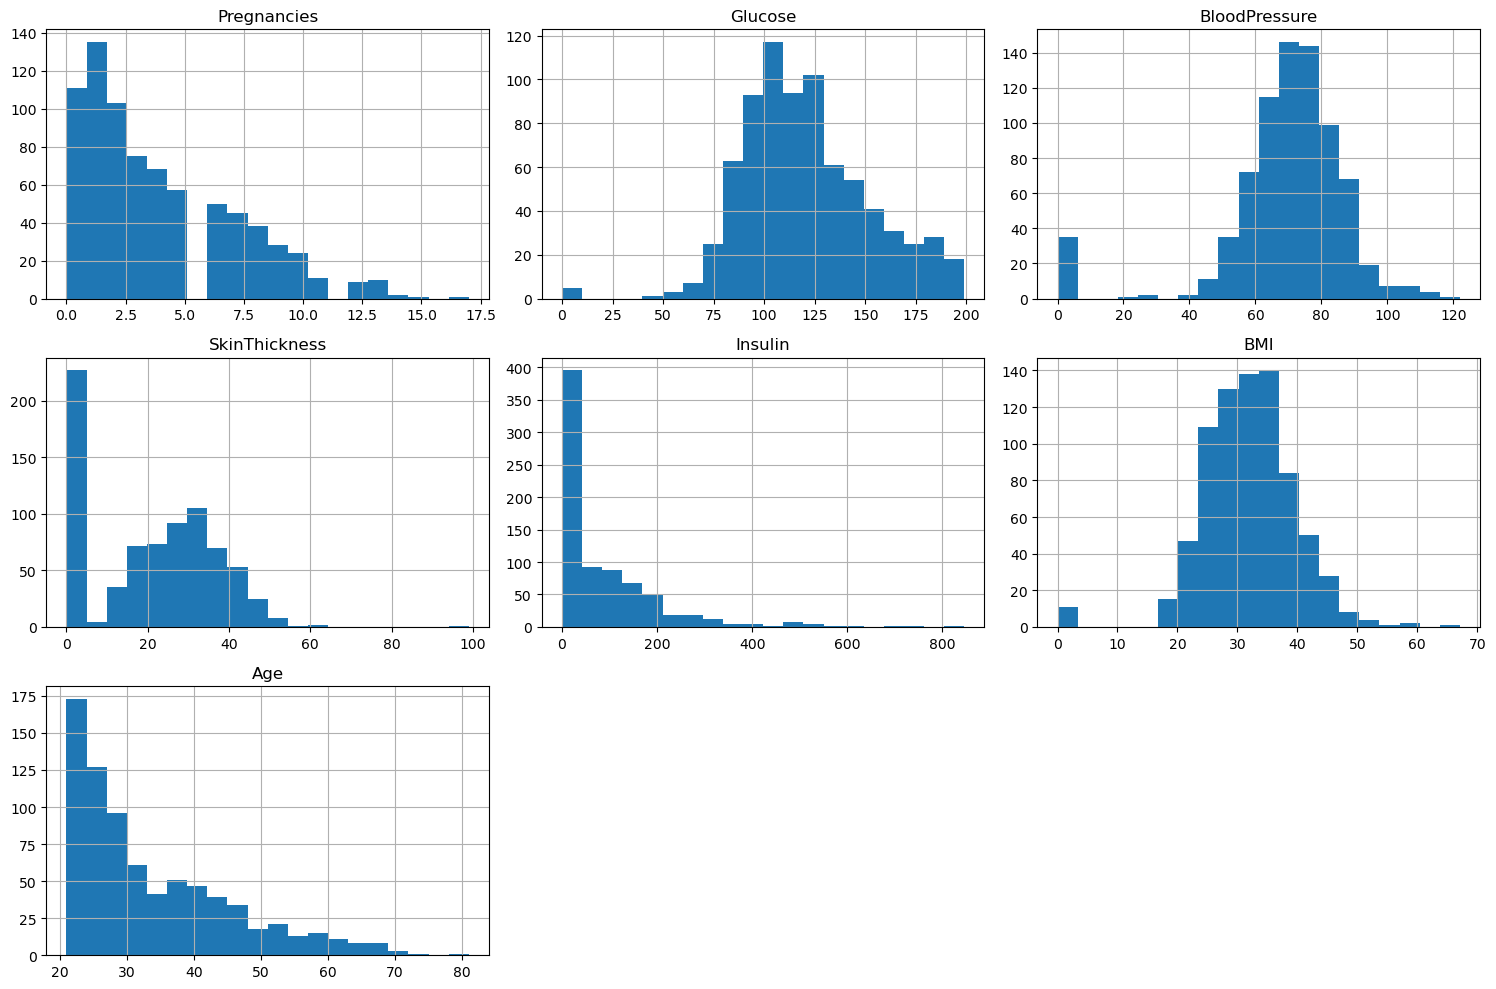

In [8]:
numerical_features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age']
df[numerical_features].hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

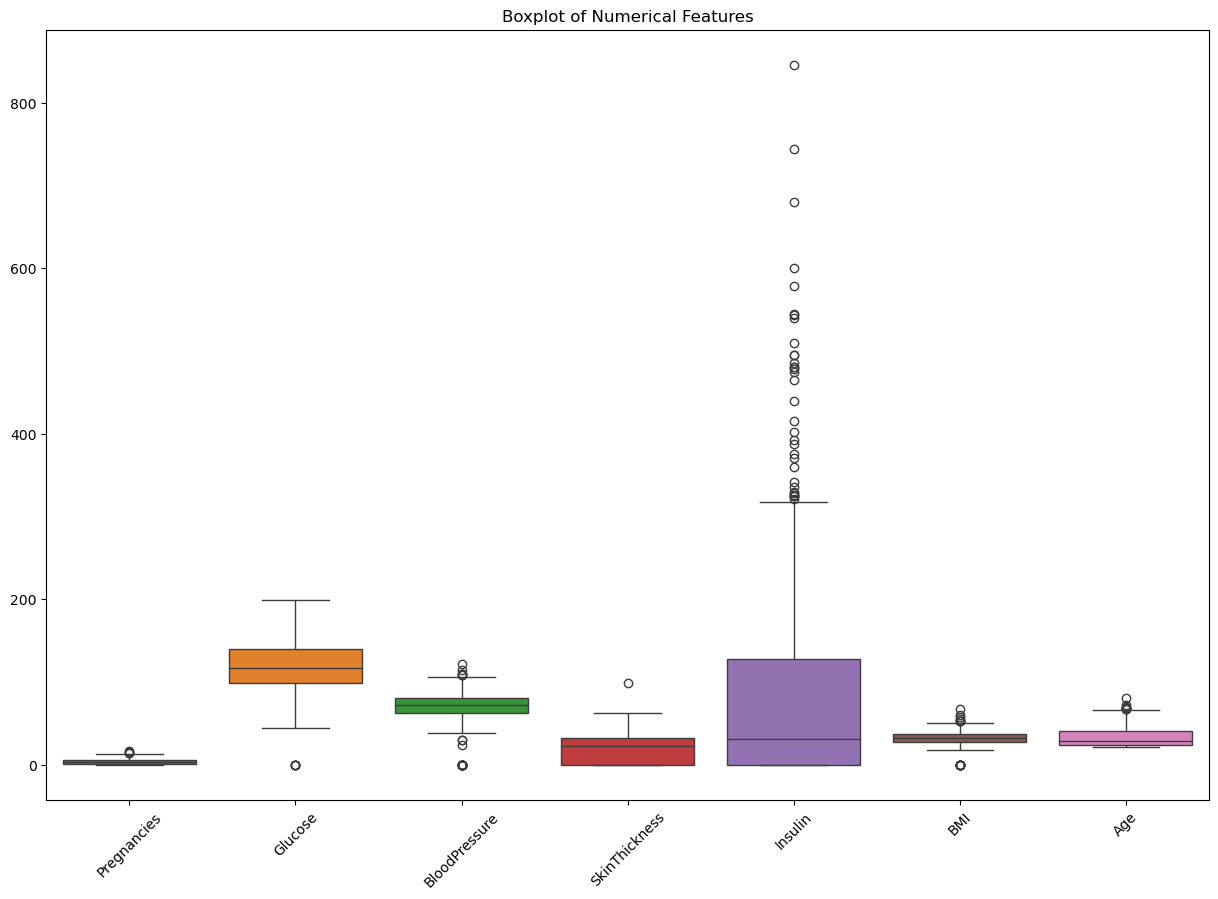

In [9]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df[numerical_features])
plt.title('Boxplot of Numerical Features')
plt.xticks(rotation=45)
plt.show()

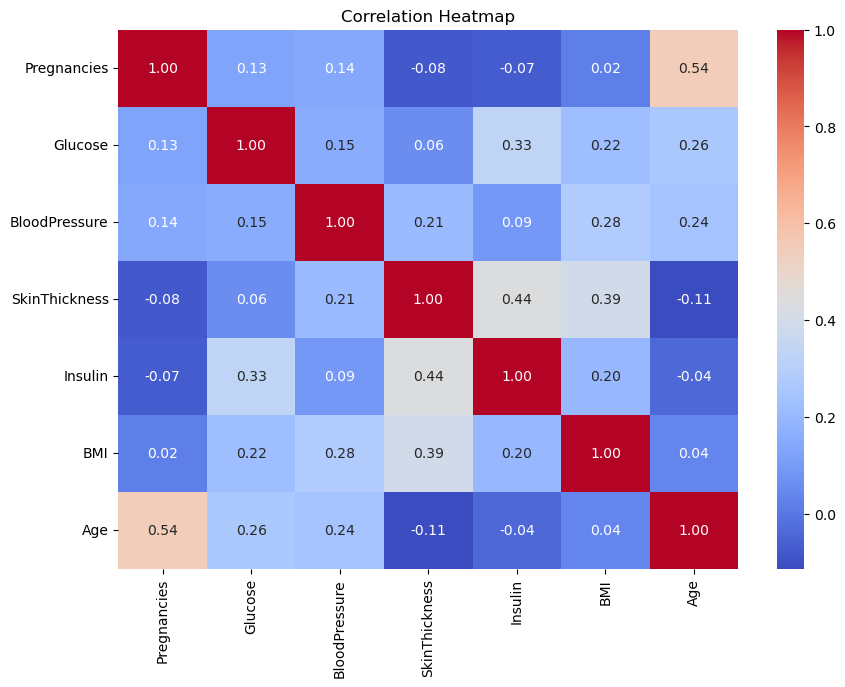

In [10]:
plt.figure(figsize=(10, 7))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

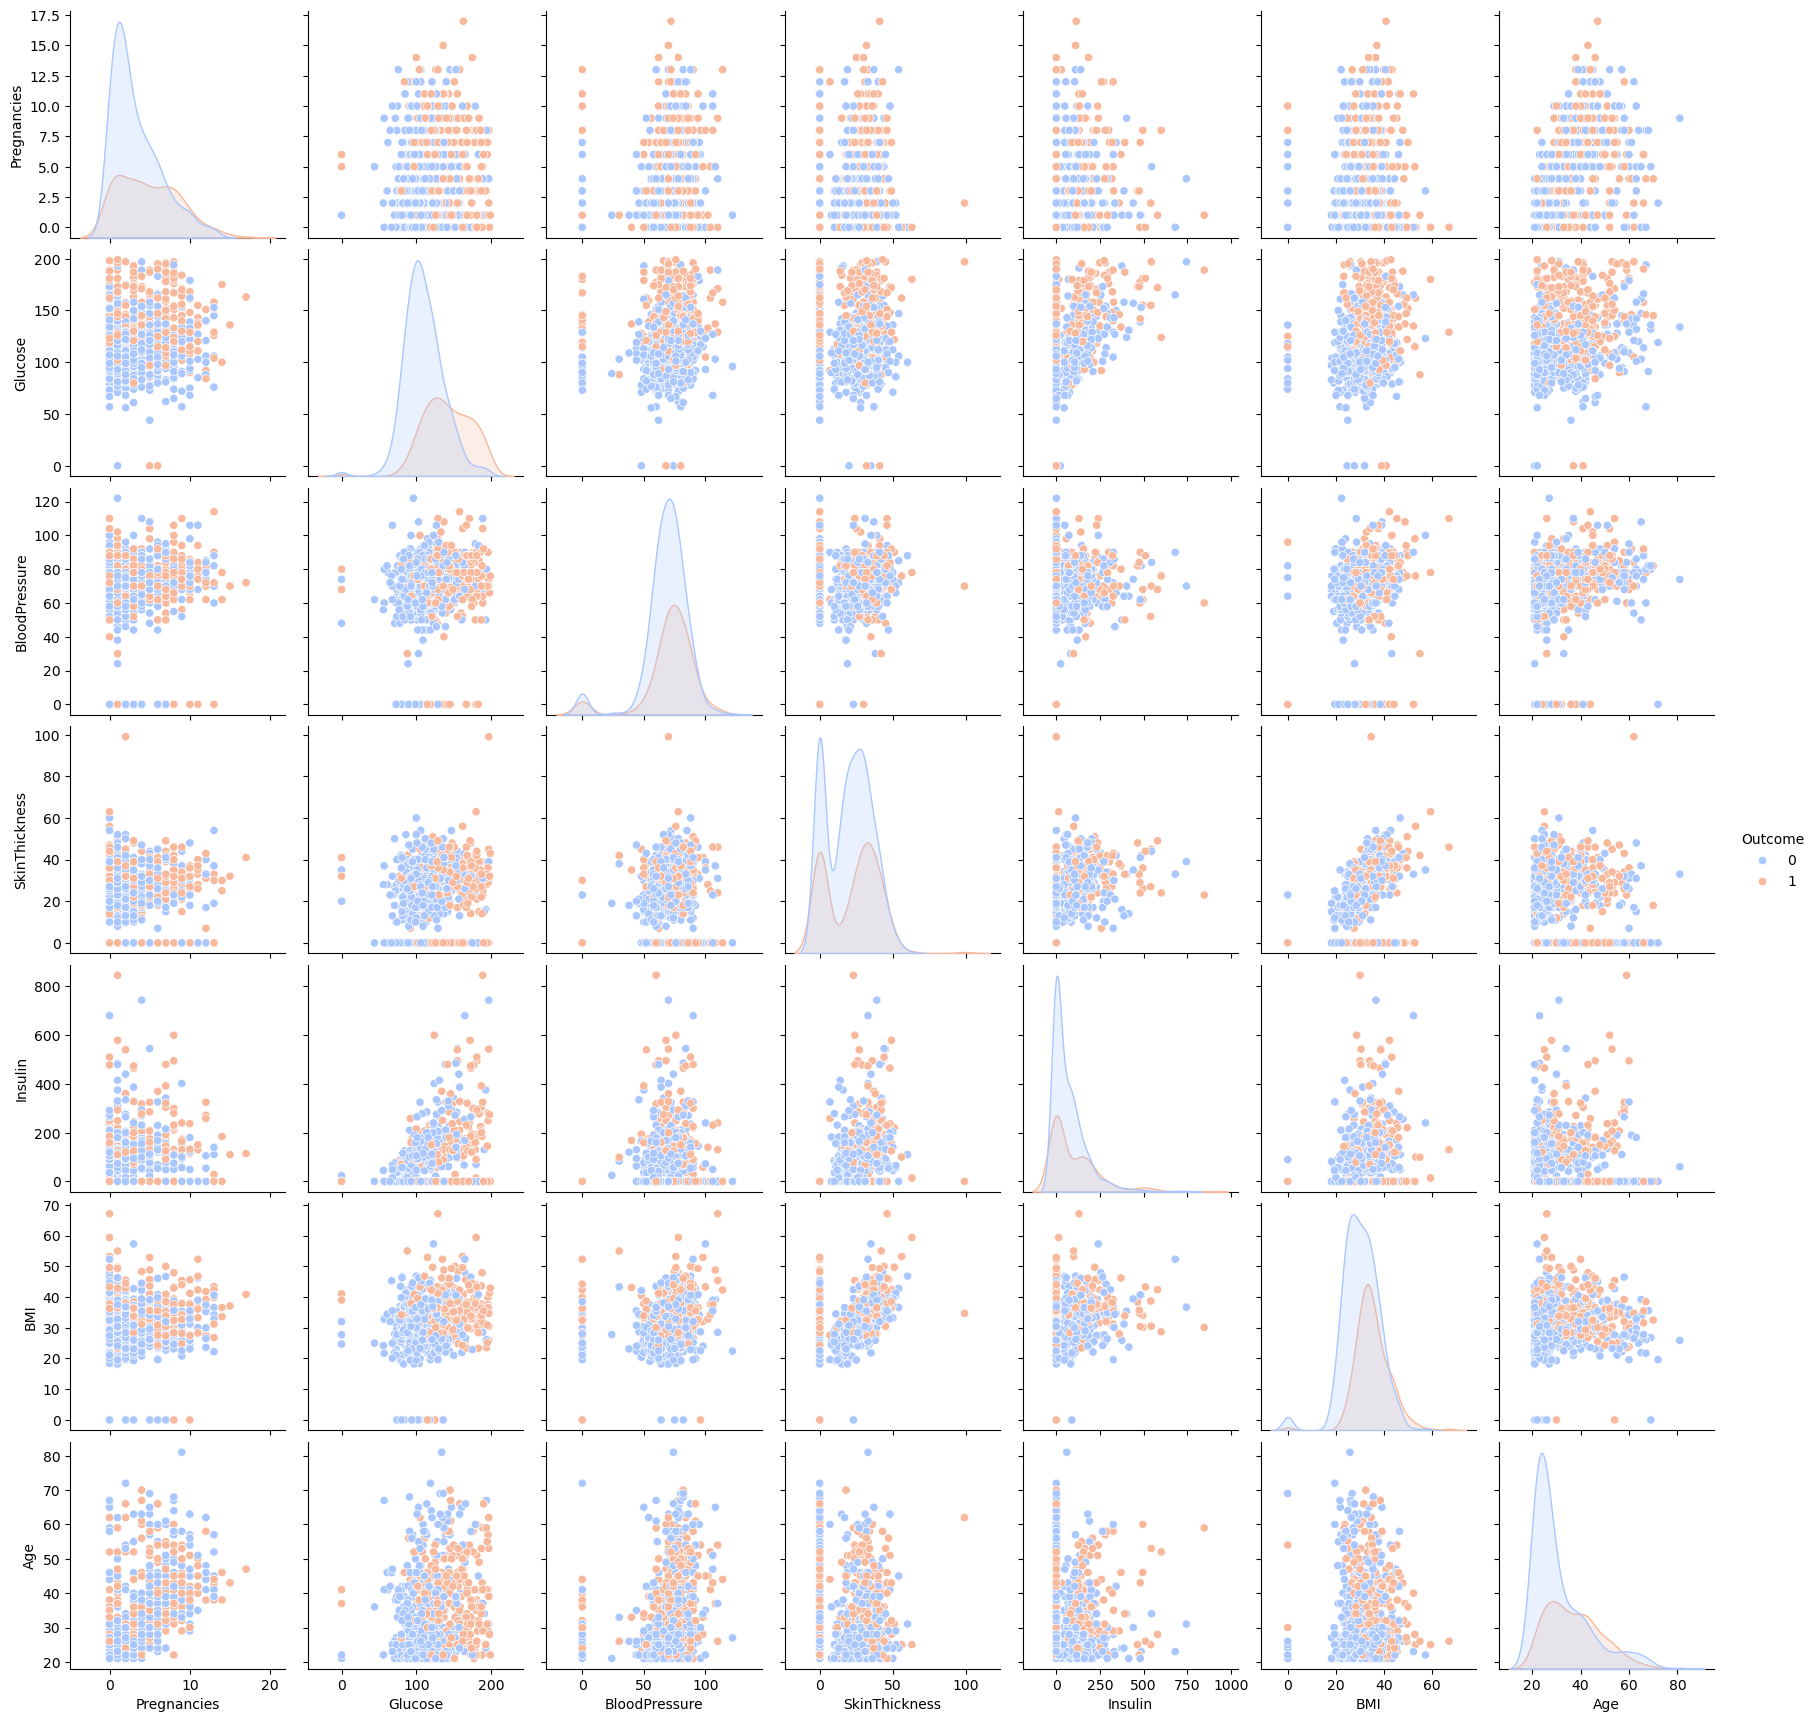

In [12]:
sns.pairplot(df, hue='Outcome', vars=numerical_features, palette='coolwarm')
plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7504\1926011791.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=df, palette='Set2')


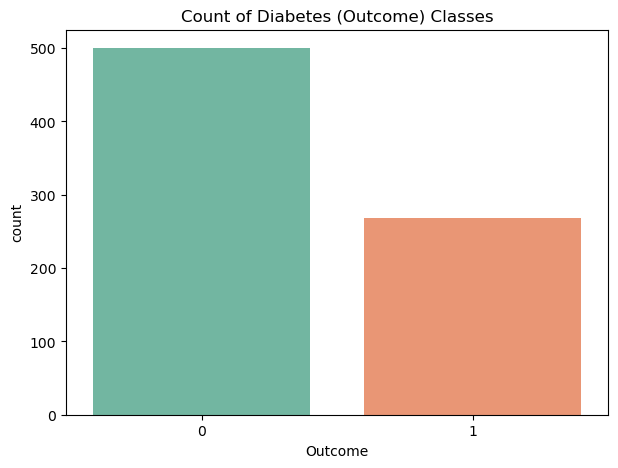

In [11]:
plt.figure(figsize=(7, 5))
sns.countplot(x='Outcome', data=df, palette='Set2')
plt.title('Count of Diabetes (Outcome) Classes')
plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7504\2347159970.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Outcome', y='Glucose', data=df, palette='coolwarm')


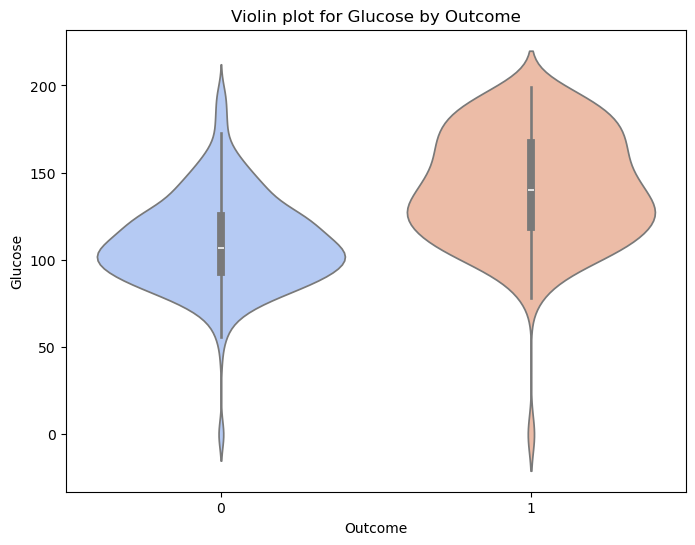

In [12]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Outcome', y='Glucose', data=df, palette='coolwarm')
plt.title('Violin plot for Glucose by Outcome')
plt.show()

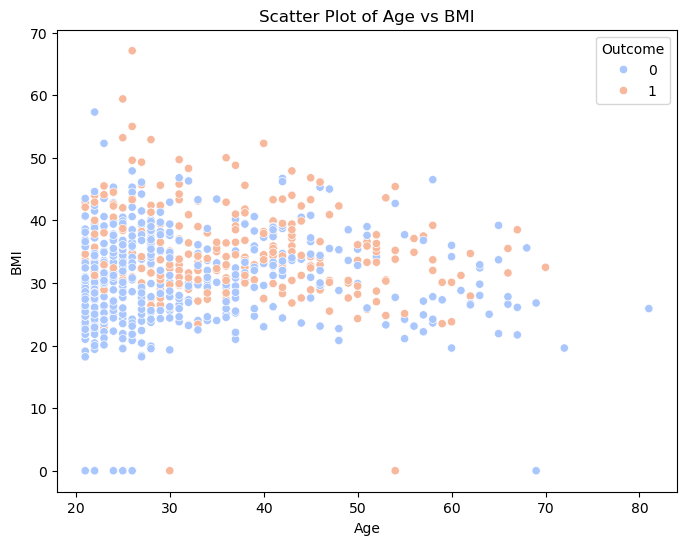

In [13]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='BMI', data=df, hue='Outcome', palette='coolwarm')
plt.title('Scatter Plot of Age vs BMI')
plt.show()

In [35]:
from sklearn.preprocessing import StandardScaler


In [37]:
X = df.drop(columns=['Outcome'])  
y = df['Outcome']  


In [42]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)
print(X_scaled)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [57]:
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
print(X_scaled_df)

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.639947  0.848324       0.149641       0.907270 -0.692891  0.204013   
1      -0.844885 -1.123396      -0.160546       0.530902 -0.692891 -0.684422   
2       1.233880  1.943724      -0.263941      -1.288212 -0.692891 -1.103255   
3      -0.844885 -0.998208      -0.160546       0.154533  0.123302 -0.494043   
4      -1.141852  0.504055      -1.504687       0.907270  0.765836  1.409746   
..           ...       ...            ...            ...       ...       ...   
763     1.827813 -0.622642       0.356432       1.722735  0.870031  0.115169   
764    -0.547919  0.034598       0.046245       0.405445 -0.692891  0.610154   
765     0.342981  0.003301       0.149641       0.154533  0.279594 -0.735190   
766    -0.844885  0.159787      -0.470732      -1.288212 -0.692891 -0.240205   
767    -0.844885 -0.873019       0.046245       0.656358 -0.692891 -0.202129   

     DiabetesPedigreeFunction       Age

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)

In [46]:
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report

In [48]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter = 1000)
lr.fit(X_train,y_train)
prediction = lr.predict(X_test)
accuracy = lr.score(X_test, y_test)
print(f"Test accuracy: {accuracy:.4f}")
print(f"Accuracy: {accuracy_score(y_test,prediction)}")
print(f"Confusion Matrix: \n {confusion_matrix(y_test,prediction)}")
print(f"Classification Report: \n{classification_report(y_test,prediction)}")



Test accuracy: 0.7532
Accuracy: 0.7532467532467533
Confusion Matrix: 
 [[79 20]
 [18 37]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



In [49]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
prediction = dt.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test,prediction)}")
print(f"Confusion Matrix: \n {confusion_matrix(y_test,prediction)}")
print(f"Classification Report: \n{classification_report(y_test,prediction)}")

Accuracy: 0.7597402597402597
Confusion Matrix: 
 [[76 23]
 [14 41]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.84      0.77      0.80        99
           1       0.64      0.75      0.69        55

    accuracy                           0.76       154
   macro avg       0.74      0.76      0.75       154
weighted avg       0.77      0.76      0.76       154



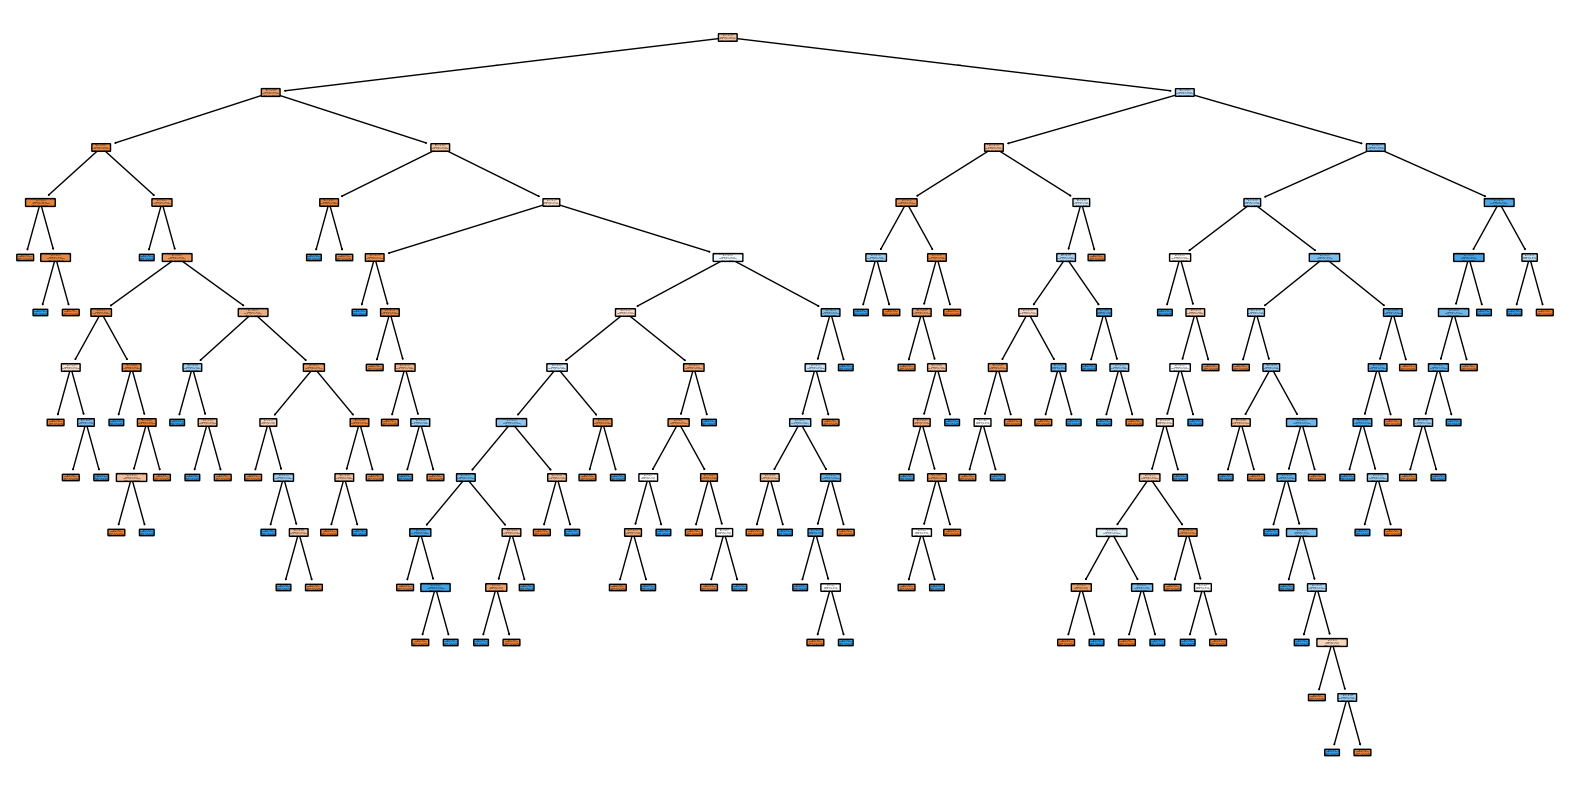

In [50]:
plt.figure(figsize=(20, 10))
plot_tree(dt, filled=True, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'], rounded=True, proportion=True)
plt.show()


In [51]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
prediction = rf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test,prediction)}")
print(f"Confusion Matrix: \n {confusion_matrix(y_test,prediction)}")
print(f"Classification Report: \n{classification_report(y_test,prediction)}")

Accuracy: 0.7337662337662337
Confusion Matrix: 
 [[78 21]
 [20 35]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.80      0.79      0.79        99
           1       0.62      0.64      0.63        55

    accuracy                           0.73       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154



In [52]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train,y_train)
prediction = svm.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test,prediction)}")
print(f"Confusion Matrix: \n {confusion_matrix(y_test,prediction)}")
print(f"Classification Report: \n{classification_report(y_test,prediction)}")

Accuracy: 0.7272727272727273
Confusion Matrix: 
 [[81 18]
 [24 31]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.77      0.82      0.79        99
           1       0.63      0.56      0.60        55

    accuracy                           0.73       154
   macro avg       0.70      0.69      0.70       154
weighted avg       0.72      0.73      0.72       154



In [53]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train,y_train)
prediction = knn.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test,prediction)}")
print(f"Confusion Matrix: \n {confusion_matrix(y_test,prediction)}")
print(f"Classification Report: \n{classification_report(y_test,prediction)}")

Accuracy: 0.6948051948051948
Confusion Matrix: 
 [[88 11]
 [36 19]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.71      0.89      0.79        99
           1       0.63      0.35      0.45        55

    accuracy                           0.69       154
   macro avg       0.67      0.62      0.62       154
weighted avg       0.68      0.69      0.67       154



In [54]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)
prediction = gbc.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test,prediction)}")
print(f"Confusion Matrix: \n {confusion_matrix(y_test,prediction)}")
print(f"Classification Report: \n{classification_report(y_test,prediction)}")

Accuracy: 0.7467532467532467
Confusion Matrix: 
 [[78 21]
 [18 37]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



In [55]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)
prediction = nb.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test,prediction)}")
print(f"Confusion Matrix: \n {confusion_matrix(y_test,prediction)}")
print(f"Classification Report: \n{classification_report(y_test,prediction)}")

Accuracy: 0.7662337662337663
Confusion Matrix: 
 [[79 20]
 [16 39]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.83      0.80      0.81        99
           1       0.66      0.71      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



In [56]:
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)
nn.fit(X_train,y_train)
prediction = nn.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test,prediction)}")
print(f"Confusion Matrix: \n {confusion_matrix(y_test,prediction)}")
print(f"Classification Report: \n{classification_report(y_test,prediction)}")


Accuracy: 0.7402597402597403
Confusion Matrix: 
 [[80 19]
 [21 34]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.79      0.81      0.80        99
           1       0.64      0.62      0.63        55

    accuracy                           0.74       154
   macro avg       0.72      0.71      0.71       154
weighted avg       0.74      0.74      0.74       154



# Conclusion
## Gaussian Naive Bayes Scored the highest Accuracy of 76.62%